# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [28]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [31]:
# define a function to calculate the mean lifetime from the half life
def meanLifetime(halfLife):
    # YOUR CODE HERE
    return halfLife*1/numpy.log(2)

T_HALF = 20.8
TAU = meanLifetime(T_HALF)

Check your average lifetime:

In [32]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [35]:
def f_rad(N, t):
    # YOUR CODE HERE
    return -N/TAU

Make sure your function works:

In [36]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [39]:
def analytic(N0, t):
    # YOUR CODE HERE
    return N0*numpy.exp(-t/(TAU))

Check your answer for a single time:

In [40]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [41]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [43]:
def solve_euler(f, n0, t0, dt, n_panels):
    # YOUR CODE HERE
    a = [n0]
    for i in range(n_panels):
        next_step = a[-1] + dt*f_rad(a[-1], t0)
        a.append(next_step)
    return a

Try your solution:

In [44]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [45]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [46]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [53]:
def solve_RK4(f, n0, t0, dt, nsteps):
    # YOUR CODE HERE
    a = [n0]
    for i in range( nsteps):
        k1 = dt*f(n0, t0)
        k2 = dt*f(n0 + 0.5*k1, t0 + 0.5*dt)
        k3 = dt*f(n0 + 0.5*k2, t0 + 0.5*dt)
        k4 = dt*f(n0 + k3, t0 + dt)
        
        n0 = (1/6)*(k1 + 2*k2 + 2*k3 + k4) + n0
        a.append(n0)
    return a

print(solve_RK4(f_rad, 1000, 0, 6, 10))

[1000, 818.7772952089829, 670.396259149738, 548.9052357848428, 449.43114428196264, 367.9840166978635, 301.2969578720139, 246.6951082211424, 201.98835345059427, 165.38347770199363, 135.41223654509346]


In [48]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [49]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [50]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


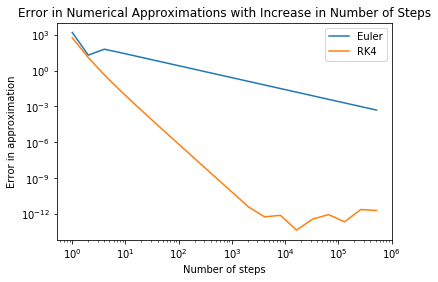

In [27]:
n0 = 1000
t0 = 0 
t_final = 75
number_steps = 2**(numpy.arange(0,20,1))

euler = []
RK4 = []

for i in number_steps:
    dt = t_final/i
    result_euler = solve_euler(f_rad, n0, t0, dt, i)
    result_RK4 = solve_RK4(f_rad, n0, t0, dt, i)
    error_euler = abs(result_euler[-1] - analytic(n0, t_final))
    error_RK4 = abs(result_RK4[-1] - analytic(n0, t_final))
    euler.append(error_euler)
    RK4.append(error_RK4)
    
a = ['Euler','RK4']

plt.loglog(number_steps, euler)
plt.loglog(number_steps, RK4)
plt.xlabel('Number of steps')
plt.ylabel('Error in approximation')
plt.title('Error in Numerical Approximations with Increase in Number of Steps')
plt.legend(a)
plt.show()